# 📈 Netflix Stock Data Analysis

## Introduction

In this project, I analyze historical stock data for Netflix to understand its price trends, volatility, trading volume, and correlations among key variables. The goal is to demonstrate exploratory data analysis (EDA) skills and communicate insights clearly for potential stakeholders.

---

**Business Problem:**  
Investors and analysts need to identify trends and patterns in stock prices to make data-driven investment decisions. This project provides a framework to analyze time-series stock data and draw actionable conclusions.

---

**Tools Used:**  
- Python (Pandas, NumPy)
- Data visualization (Matplotlib, Seaborn)
- Jupyter Notebook


In [21]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')


In [22]:
# Load Dataset

df = pd.read_csv('Netflix_stock_data.csv')

# Show first few rows
df.head()


,Date,Close,High,Low,Open,Volume
0,2002-05-23,1.196429,1.242857,1.145714,1.156429,104790000
1,2002-05-24,1.210000,1.225000,1.197143,1.214286,11104800
2,2002-05-28,1.157143,1.232143,1.157143,1.213571,6609400
3,2002-05-29,1.103571,1.164286,1.085714,1.164286,6757800
4,2002-05-30,1.071429,1.107857,1.071429,1.107857,10154200


In [23]:
# Basic Info

print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.info()
df.describe()
### 📉 30-Day Moving Average


Rows: 5810, Columns: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5810 entries, 0 to 5809
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5810 non-null   object 
 1   Close   5810 non-null   float64
 2   High    5810 non-null   float64
 3   Low     5810 non-null   float64
 4   Open    5810 non-null   float64
 5   Volume  5810 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 272.5+ KB


,Close,High,Low,Open,Volume
count,5810.000000,5810.000000,5810.000000,5810.000000,5.810000e+03
mean,174.277189,176.778673,171.606167,174.184463,1.513608e+07
std,238.038218,241.092964,234.690133,237.807511,1.836569e+07
min,0.372857,0.410714,0.346429,0.377857,2.856000e+05
25%,4.307500,4.406428,4.226071,4.310714,5.385225e+06
50%,47.330715,48.094999,46.490715,47.347857,9.366850e+06
75%,319.687500,324.845009,313.472504,319.279991,1.803375e+07
max,1279.109985,1298.000000,1273.810059,1286.839966,3.234140e+08


In [24]:
# Data Cleaning

# Check missing values
print(df.isnull().sum())

# Drop NA if any
df = df.dropna()

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values('Date')

df.head()


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


,Date,Close,High,Low,Open,Volume
0,2002-05-23,1.196429,1.242857,1.145714,1.156429,104790000
1,2002-05-24,1.210000,1.225000,1.197143,1.214286,11104800
2,2002-05-28,1.157143,1.232143,1.157143,1.213571,6609400
3,2002-05-29,1.103571,1.164286,1.085714,1.164286,6757800
4,2002-05-30,1.071429,1.107857,1.071429,1.107857,10154200


##  Exploratory Data Analysis (EDA)

### 📊 Netflix Closing Price Over Time


### 📉 30-Day Moving Average


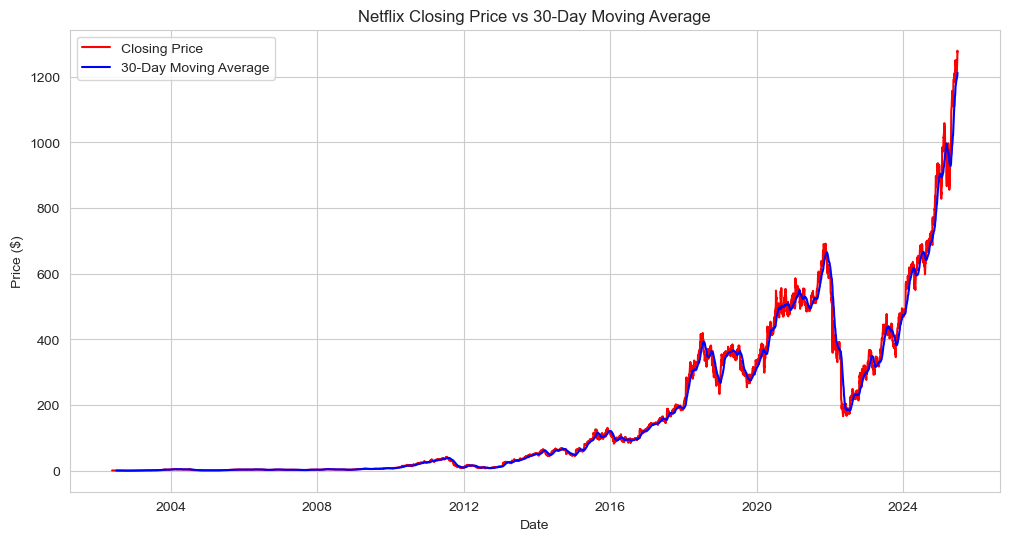

In [10]:
# Calculate 30-day moving average
df['MA30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='red')
plt.plot(df['Date'], df['MA30'], label='30-Day Moving Average', color='blue')
plt.title('Netflix Closing Price vs 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


### 📈 Trading Volume Over Time


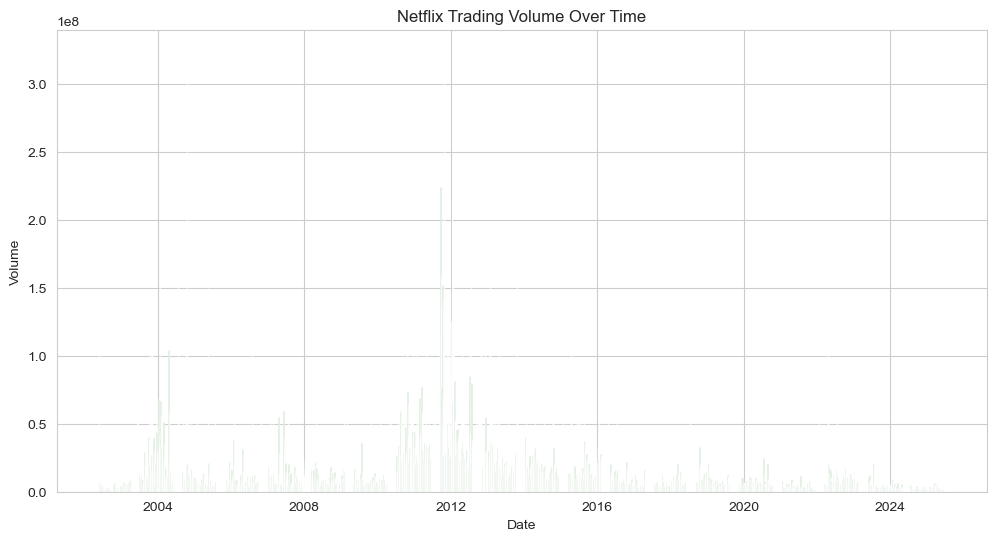

In [17]:
plt.figure(figsize=(12,6))
plt.bar(df['Date'], df['Volume'], color='green', alpha=0.7)
plt.title('Netflix Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


### 🔥 Correlation Heatmap


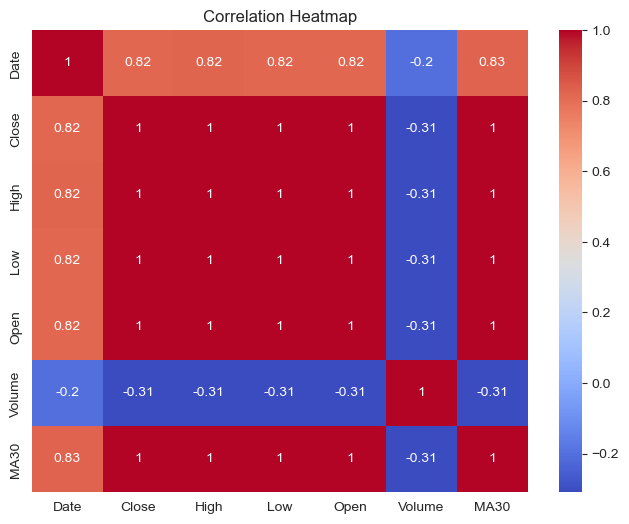

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### 📈 Daily Returns


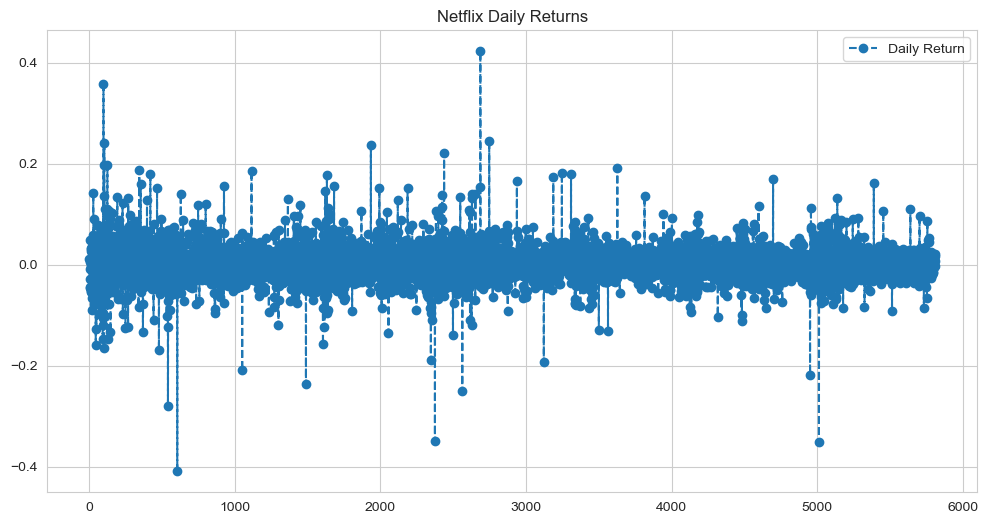

In [19]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(12,6))
df['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title('Netflix Daily Returns')
plt.show()


In [20]:
# Mean & std dev of daily returns
mean_return = df['Daily Return'].mean()
std_return = df['Daily Return'].std()

print(f"Mean Daily Return: {mean_return:.4f}")
print(f"Standard Deviation of Daily Return: {std_return:.4f}")


Mean Daily Return: 0.0018
Standard Deviation of Daily Return: 0.0347


## Conclusions

### 🎯 Summary of Findings

- **Netflix’s stock price shows an overall upward trend**, with periods of growth and correction.
- The **30-day moving average** smooths out noise and shows the trend clearly.
- **Daily returns show moderate volatility**, typical for a growth tech stock.
- **Trading volume spikes align with major price movements**, indicating news or earnings impacts.
- **Correlation analysis** confirms strong internal consistency among price features.

---

### 📌 Key Insights

- **Long-term investors** can use the moving average to ride out short-term fluctuations.
- **Traders** can use daily returns and volume spikes to plan entry/exit points.
- This framework can be **adapted to other stocks** for similar insights.

---

### ✅ Takeaway

> 📈 Combining **descriptive statistics**, **time-series visualization**, and **moving averages** can reveal actionable insights for data-driven investment decisions.




